<a href="https://colab.research.google.com/github/farhangh/Python-ML/blob/main/pythonManipSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#!pip install unidecode

In [96]:
import unidecode
import pandas as pd
import seaborn as seab
from matplotlib import pyplot as plt

seab.set(font_scale=1.5)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = None

In [97]:
names=["date", "client_category", "daily_consumption"]
df_cons = pd.read_csv( "cons_elec_france.csv", sep=";", names=names )
df_cons.head()

,date,client_category,daily_consumption
0,2015-11-13,Entreprises,13882225479
1,2015-11-11,Professionnels,3746294820
2,2015-12-18,Professionnels,5523363437
3,2015-12-06,Résidentiels,22545973870
4,2015-10-30,Résidentiels,15903891494


In [98]:
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               7304 non-null   object
 1   client_category    7304 non-null   object
 2   daily_consumption  7304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 171.3+ KB


In [99]:
df_cons.dtypes

date                 object
client_category      object
daily_consumption     int64
dtype: object

In [100]:
df_cons.shape

(7304, 3)

In [101]:
df_cons = df_cons.drop_duplicates()
df_cons.shape
# No duplicates

(7304, 3)

In [102]:
df_cons.describe()

,daily_consumption
count,7.304000e+03
mean,9.882748e+09
std,6.234929e+09
min,2.812475e+09
25%,4.720512e+09
50%,8.149467e+09
75%,1.401314e+10
max,3.635733e+10


In [103]:
df_cons["daily_consumption"] = df_cons["daily_consumption"].astype(float)
df_cons.dtypes

date                  object
client_category       object
daily_consumption    float64
dtype: object

In [104]:
df_cons["date"] = pd.to_datetime(df_cons["date"], format="%Y-%m-%d", errors="coerce")
df_cons.dtypes

date                 datetime64[ns]
client_category              object
daily_consumption           float64
dtype: object

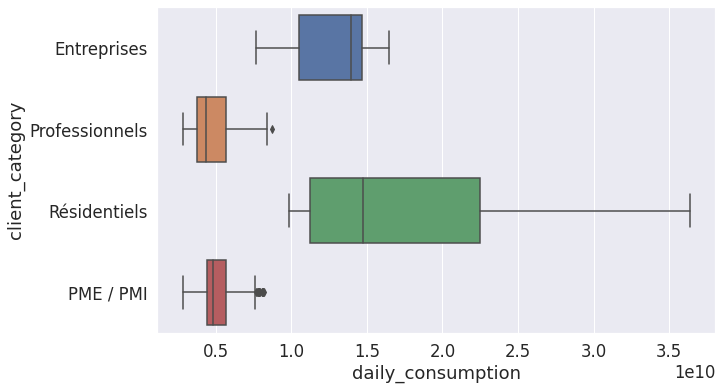

In [105]:
# Boxplot is a powerfull tool to illustraues the outliers. 
# Look for on-line documention on boxplots.
fig, ax = plt.subplots( figsize=(10, 6) )
seab.boxplot( data=df_cons, x="daily_consumption", y="client_category", orient="h" )
plt.show()

In [106]:
df_cons["date"].min(), df_cons["date"].max()

(Timestamp('2013-08-25 00:00:00'), Timestamp('2018-08-24 00:00:00'))

In [107]:
#df_cons[df_cons.date.dt.year>2013].sort_values(by=["date"]).head()
df_cons[df_cons["date"].dt.year>2013].sort_values("date").head()

,date,client_category,daily_consumption
3962,2014-01-01,Résidentiels,2.506179e+10
3963,2014-01-01,Entreprises,8.724748e+09
1305,2014-01-01,Professionnels,5.310044e+09
4104,2014-01-01,PME / PMI,4.442757e+09
4352,2014-01-02,Résidentiels,2.249822e+10


In [108]:
# Task : add a new column "year" to df_cons that contains 
#        the year for each entry.
# Hint : you should extract year from df_cons["date"]
df_cons["year"] = df_cons["date"].dt.year

In [109]:
df_cons.head()

,date,client_category,daily_consumption,year
0,2015-11-13,Entreprises,1.388223e+10,2015
1,2015-11-11,Professionnels,3.746295e+09,2015
2,2015-12-18,Professionnels,5.523363e+09,2015
3,2015-12-06,Résidentiels,2.254597e+10,2015
4,2015-10-30,Résidentiels,1.590389e+10,2015


In [110]:
df_cons.dtypes

date                 datetime64[ns]
client_category              object
daily_consumption           float64
year                          int64
dtype: object

In [111]:
df_cons.describe()

,daily_consumption,year
count,7.304000e+03,7304.000000
mean,9.882748e+09,2015.646769
std,6.234929e+09,1.492538
min,2.812475e+09,2013.000000
25%,4.720512e+09,2014.000000
50%,8.149467e+09,2016.000000
75%,1.401314e+10,2017.000000
max,3.635733e+10,2018.000000


In [112]:
# Task : find the unique categories in client_category 
#   columns by applying the unique() method.

df_cons["client_category"].unique()

array(['Entreprises', 'Professionnels', 'Résidentiels', 'PME / PMI'],
      dtype=object)

In [113]:
# Task : explain the following code :
df_cons["client_category"] = df_cons["client_category"].str.lower()

In [114]:
df_cons["client_category"].unique()

array(['entreprises', 'professionnels', 'résidentiels', 'pme / pmi'],
      dtype=object)

In [115]:
# Removing the accents from client_category column
df_cons["client_category"] = df_cons["client_category"].apply(unidecode.unidecode)

In [116]:
df_cons["client_category"].unique()

array(['entreprises', 'professionnels', 'residentiels', 'pme / pmi'],
      dtype=object)

In [117]:
# Mean consumption per client category
# Task : explain the following code line by line :
df_cl_cons = df_cons[["daily_consumption", "client_category"]]\
    .groupby( "client_category" ).mean() \
    .reset_index()\
    .sort_values("daily_consumption")\
    .rename( columns={"daily_consumption" : "mean_consumption"} )

In [118]:
#df_cl_cons.columns= ["ClCat", "meanCons"]

In [119]:
df_cl_cons.columns

Index(['client_category', 'mean_consumption'], dtype='object')

In [120]:
df_cl_cons.head()

,client_category,mean_consumption
2,professionnels,4.737157e+09
1,pme / pmi,4.999475e+09
0,entreprises,1.286533e+10
3,residentiels,1.692903e+10


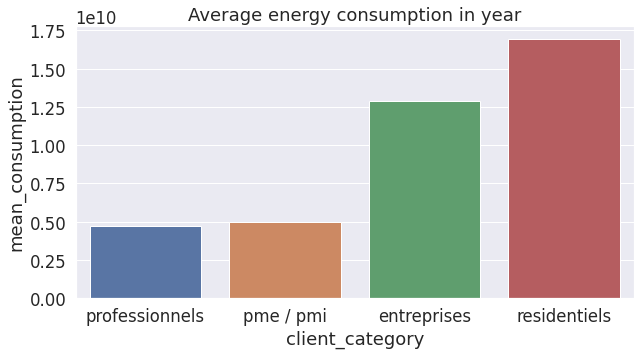

In [121]:
# Task : run and explain the following code :
fig, axs = plt.subplots( figsize=(10, 5) )
seab.barplot( data=df_cl_cons, x="client_category", y="mean_consumption" )
plt.title( "Average energy consumption in year" )
plt.show()

In [122]:
# Task : compute the total energy consumption per year per different 
#        client category
# Hint : use groupby method to regroup the df_cons by year and 
#        client_category and 
#        then sum on daily_consumption. date column should not be  
#        included in groupby.

df_year_cat = df_cons.drop(columns=["date"])\
                    .groupby( ["year", "client_category"] ).sum()\
                    .reset_index()
df_year_cat.head(10)

,year,client_category,daily_consumption
0,2013,entreprises,1.702219e+12
1,2013,pme / pmi,6.290443e+11
2,2013,professionnels,6.500776e+11
3,2013,residentiels,2.281108e+12
4,2014,entreprises,4.702533e+12
5,2014,pme / pmi,1.707706e+12
6,2014,professionnels,1.702861e+12
7,2014,residentiels,5.903346e+12
8,2015,entreprises,4.732596e+12
9,2015,pme / pmi,1.771248e+12


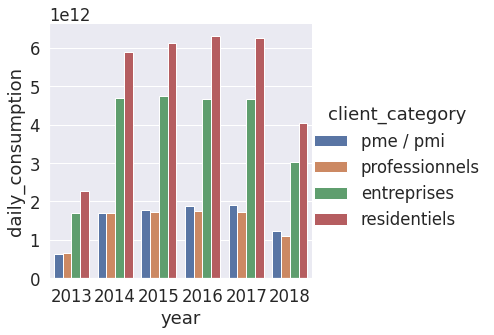

In [123]:
seab.catplot(x="year", y="daily_consumption", hue="client_category",
               data=df_year_cat.sort_values("daily_consumption"), kind="bar")
plt.show()

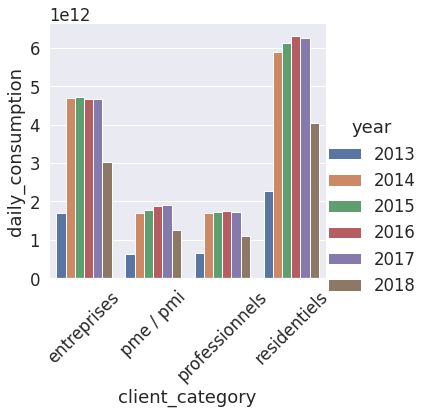

In [124]:
seab.catplot(x="client_category", y="daily_consumption", hue="year",
               data=df_year_cat, kind="bar")
plt.xticks(rotation=45)
plt.show()

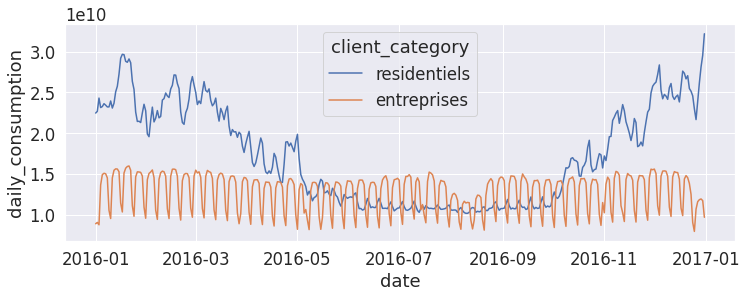

In [125]:
# Task : From df_cons select data for 2016 with "residentiels" and 
#        "entreprises" as clients. Make a lineplot for  
#        daily_consumption versus date for the two different 
#        client categoris.

dft = df_cons[ (df_cons["year"]==2016) & 
              ( df_cons["client_category"].isin(["residentiels", "entreprises"]) ) 
             ]
fig, ax = plt.subplots( figsize=(12,4) )
seab.lineplot( data=dft, x="date", y="daily_consumption", hue="client_category" )
plt.show()

In [126]:
# Question : Interpret the previous plot. 
#            Why the plots varies by time for residentials ?
#            Why for enterprises the plot is comb-like ? 

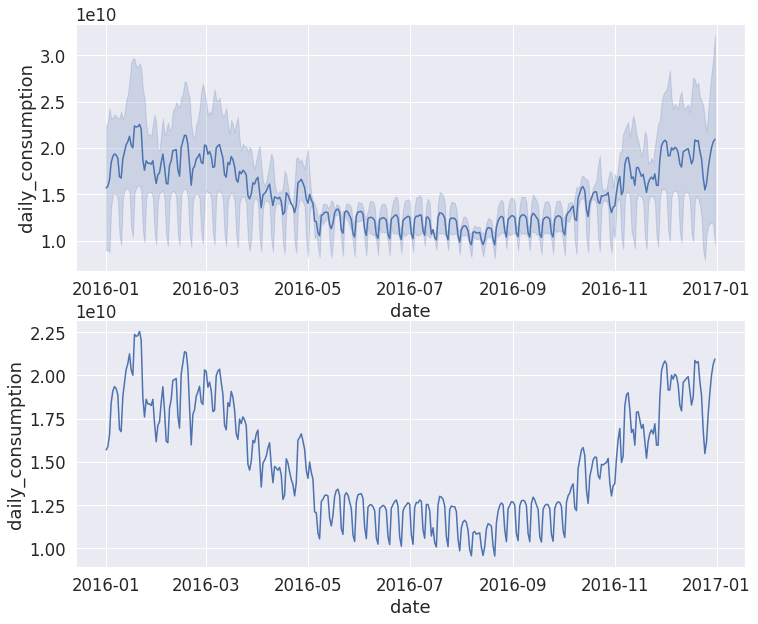

In [127]:
# Task : Replot the previous task without using the hue parameter and 
#        explain the difference.

dft = df_cons[ (df_cons["year"]==2016) & 
              ( df_cons["client_category"].isin(["residentiels", "entreprises"]) ) 
             ]
fig, ax = plt.subplots( 2, 1, figsize=(12,10) )
seab.lineplot( data=dft, x="date", y="daily_consumption", ax=ax[0] )
seab.lineplot( data=dft, x="date", y="daily_consumption", ci=None, ax=ax[1] )

plt.show()

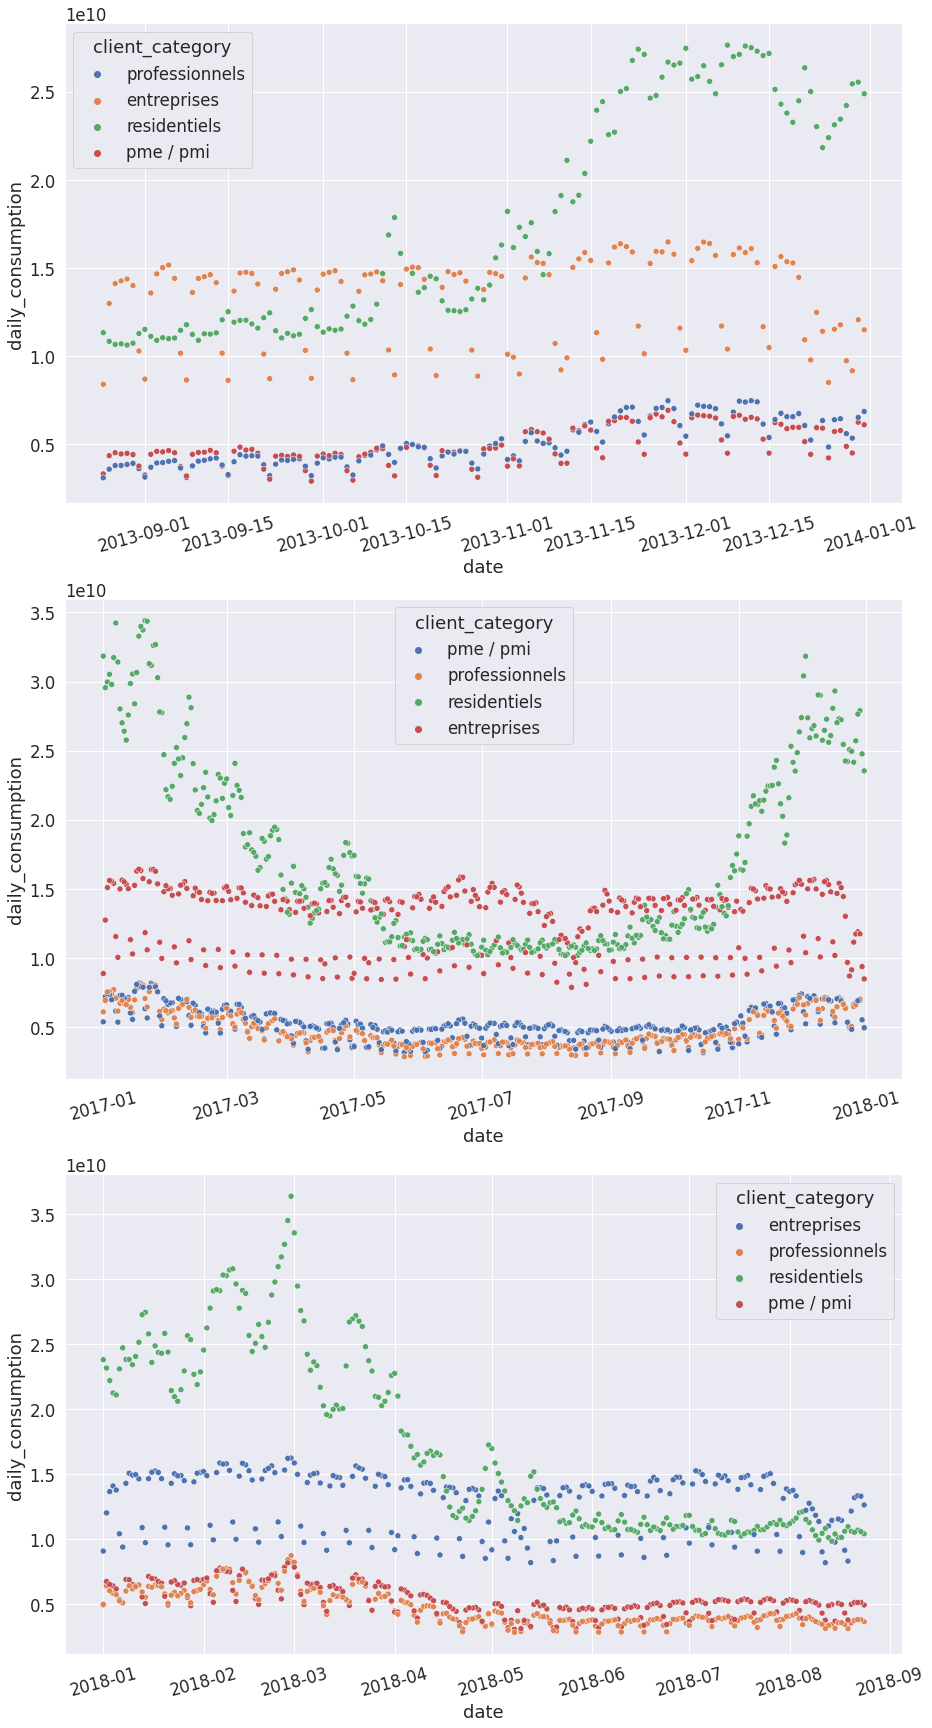

In [128]:
# Task : Explaine the following code :
fig, axs = plt.subplots( 3,1, figsize=(15, 30) )
for i, y in enumerate( [2013, 2017, 2018] ) :
    seab.scatterplot( data=df_cons[df_cons["year"]==y], 
                 x="date", y="daily_consumption", hue="client_category",ax=axs[i] )
    axs[i].tick_params(axis='x', rotation=15)



## Exercises 
**groupby followed by multiple aggregation** 
* Regroup the df_cons dataframe by client_category and year then find a method that make a sum over daily_consumption and count on date. Sort the regrouped dataframe by daily_consumption and rename the columns as : "client_category", "year", "yearly_consumption" and "n_days". 
* Display the regrouped dataframe. 
* Make a barplot that shows the some of yearly_consumption versus n_days for different client categories.

*italicized text*

In [129]:
df_cly_cons = df_cons.groupby( ["client_category","year"] )\
                .agg( {"daily_consumption": "sum",
                       "date" : "count"})\
                .reset_index()\
                .sort_values( "daily_consumption" )
df_cly_cons.columns = ["client_category", "year", "yearly_consumption", "n_days"]
df_cly_cons

,client_category,year,yearly_consumption,n_days
6,pme / pmi,2013,6.290443e+11,129
12,professionnels,2013,6.500776e+11,129
17,professionnels,2018,1.103792e+12,236
11,pme / pmi,2018,1.244182e+12,236
0,entreprises,2013,1.702219e+12,129
13,professionnels,2014,1.702861e+12,365
7,pme / pmi,2014,1.707706e+12,365
14,professionnels,2015,1.721957e+12,365
16,professionnels,2017,1.730078e+12,365
15,professionnels,2016,1.741283e+12,366


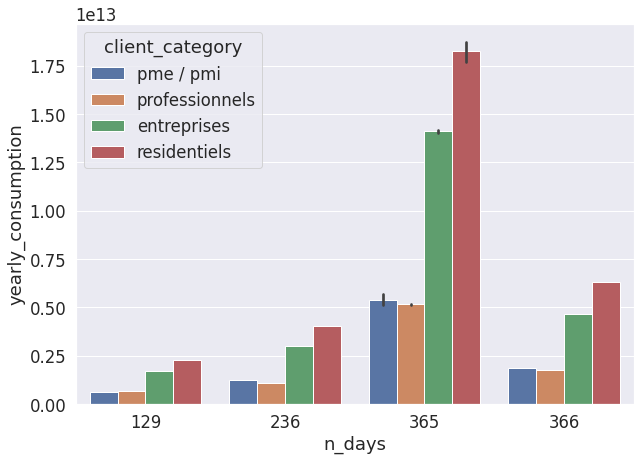

In [130]:
fig, ax = plt.subplots( figsize=(10,7) )
seab.barplot( data=df_cly_cons, 
             x="n_days", y="yearly_consumption", hue="client_category",
             estimator=sum)
plt.show()

## Exercises 

**Mean consumption per weekdays**
* From df_cons select data for 2017 and residential category. Extract the week day names from the date column. Compute the mean consumption per day. 
* Make lineplot for mean consumption versus week day. 
* How do you interpret the plot ? 

In [131]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dft_m = df_cons[ (df_cons["year"]==2017) & ( df_cons["client_category"]=="residentiels" ) ]
dft_m = dft_m[["date", "daily_consumption"]].copy()
dft_m["date"] = dft_m["date"].dt.day_name()
dft_m = dft_m.groupby("date").mean().reindex(cats)



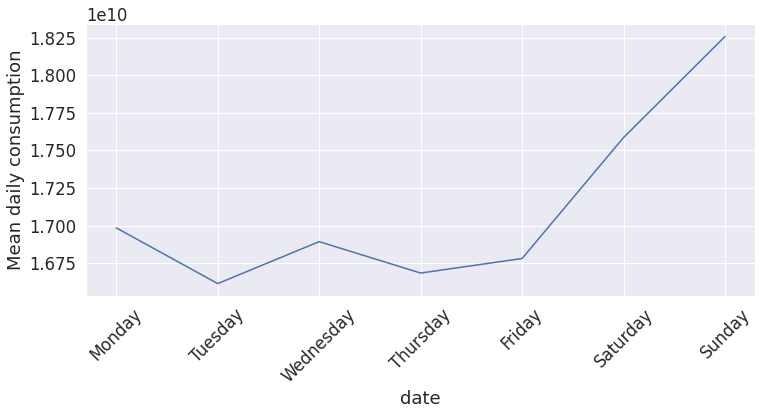

In [132]:
fig, ax = plt.subplots( figsize=(12,5) )
seab.lineplot( data=dft_m, x="date", y="daily_consumption" )
plt.xticks( rotation=45 )
plt.ylabel("Mean daily consumption")
plt.show()